In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


import xgboost as xgb


from sklearn.metrics import r2_score

Matplotlib is building the font cache; this may take a moment.


In [50]:
data = pd.read_csv('train.csv')

## EDA

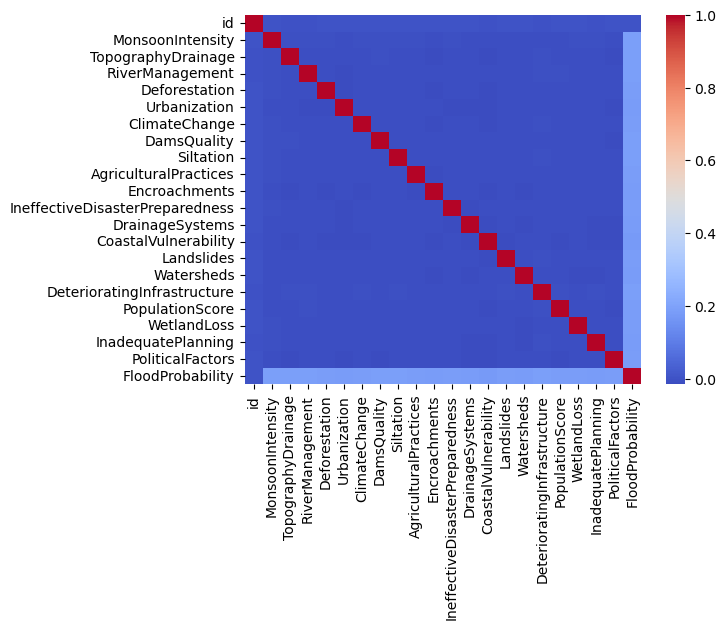

In [62]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [52]:
# Generate a column profile
def column_profile(df):
    profile = pd.DataFrame({
        'dtype': df.dtypes,
        'min': df.min(),
        'max': df.max(),
        'distinct_values': df.nunique(),
        'missing_values': df.isnull().sum(),
        'mean': df.mean()
    })
    return profile

In [53]:
profile = column_profile(data)

In [54]:
profile

,dtype,min,max,distinct_values,missing_values,mean
id,int64,0.000,1117956.000,1117957,0,558978.000000
MonsoonIntensity,int64,0.000,16.000,17,0,4.921450
TopographyDrainage,int64,0.000,18.000,19,0,4.926671
RiverManagement,int64,0.000,16.000,17,0,4.955322
Deforestation,int64,0.000,17.000,18,0,4.942240
Urbanization,int64,0.000,17.000,18,0,4.942517
ClimateChange,int64,0.000,17.000,18,0,4.934093
DamsQuality,int64,0.000,16.000,17,0,4.955878
Siltation,int64,0.000,16.000,17,0,4.927791
AgriculturalPractices,int64,0.000,16.000,17,0,4.942619


### Notes on the data
* There are no missing values
* Each column has 17-20 distinct value, all in the range (16, 18)
* The distributions for each feature look quite similar

## Transformation

In [55]:
target = 'FloodProbability'

X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=23)

In [56]:
# Define a pipeline for simple scaling
scale_pipe = Pipeline([
    ('scaler', StandardScaler())
])
scale_pipe.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler())])

In [57]:
# Transform both the training and testing data
X_train_scaled = scale_pipe.transform(X_train)
X_test_scaled = scale_pipe.transform(X_test)

# Convert the results back to DataFrames for easier viewing
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Model Testing

In [58]:
def eval_r2(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Evaluate the model
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)
    # Calculate residuals
    
    train_residuals = y_train - train_preds
    test_residuals = y_test - test_preds

    print(f"Train R² Score: {train_r2}")
    print(f"Test R² Score: {test_r2}")
    
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=train_preds, y=train_residuals, alpha=0.6)
    plt.axhline(0, color='r', linestyle='--')
    plt.title('Train Residuals')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=test_preds, y=test_residuals, alpha=0.6)
    plt.axhline(0, color='r', linestyle='--')
    plt.title('Test Residuals')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()
    return

Train R² Score: 0.8188981542873915
Test R² Score: 0.8116616397425395


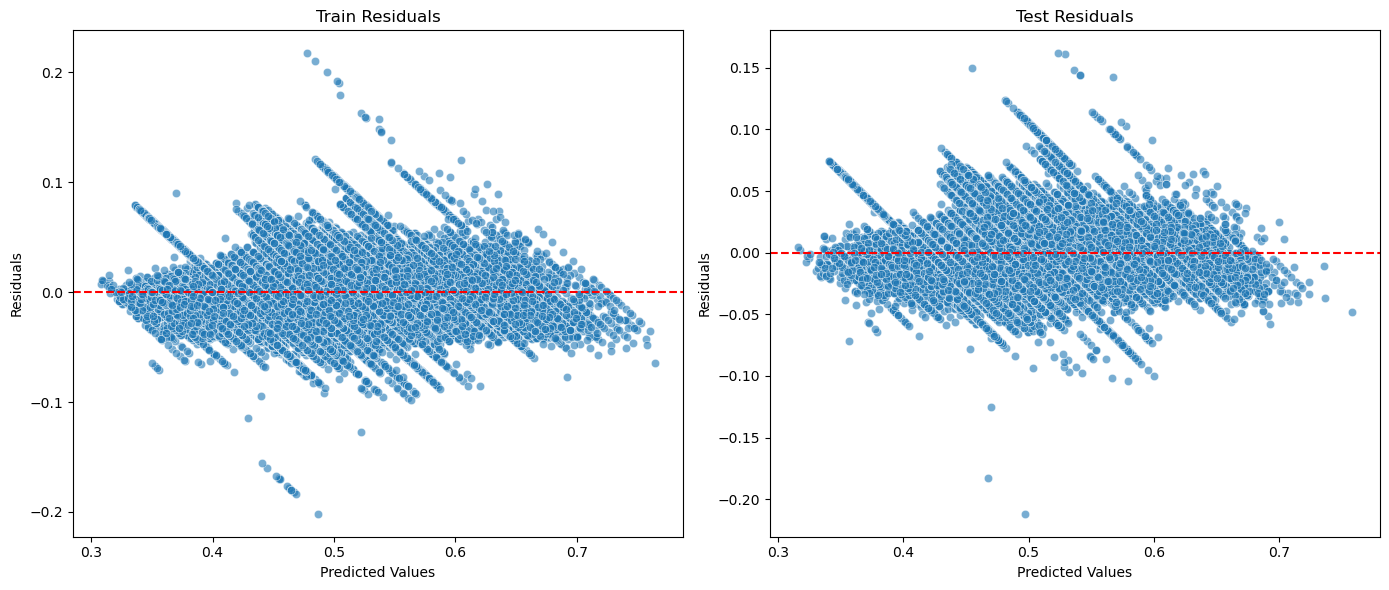

In [59]:
xgb_model_simple = xgb.XGBRegressor()

eval_r2(model=xgb_model_simple,
        X_train=X_train_scaled,
        X_test=X_test_scaled,
        y_train=y_train,
        y_test=y_test, 
        )